In [7]:
import pandas as pd

In [8]:
titanic_df = pd.read_csv('titanic_processed.csv')

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,14.0,0,0,7.8542,0,0,1
1,1,1,1,28.0,0,0,26.5500,0,0,1
2,1,1,0,36.0,1,2,120.0000,0,0,1
3,0,3,1,17.0,1,0,7.0542,0,0,1
4,0,3,1,4.0,4,2,31.2750,0,0,1


In [9]:
titanic_df.shape

(712, 10)

In [10]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [12]:
x_test.shape, y_test.shape

((143, 9), (143,))

### Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [14]:
y_pred = logistic_model.predict(x_test)

### Confusion matrix

In [15]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [16]:
pred_results.head()

,y_test,y_pred
238,0,1
367,1,1
201,0,0
200,0,0
633,0,0


In [17]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,83,16
1,11,33


### Precision-recall scores

When we use these for multiclass classification we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8111888111888111
precision_score :  0.75
recall_score :  0.673469387755102


In [20]:
titanic_crosstab

y_test,0,1
y_pred,,
0,83,16
1,11,33


In [21]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [22]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.8111888111888111

In [23]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

0.75

In [24]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.673469387755102

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


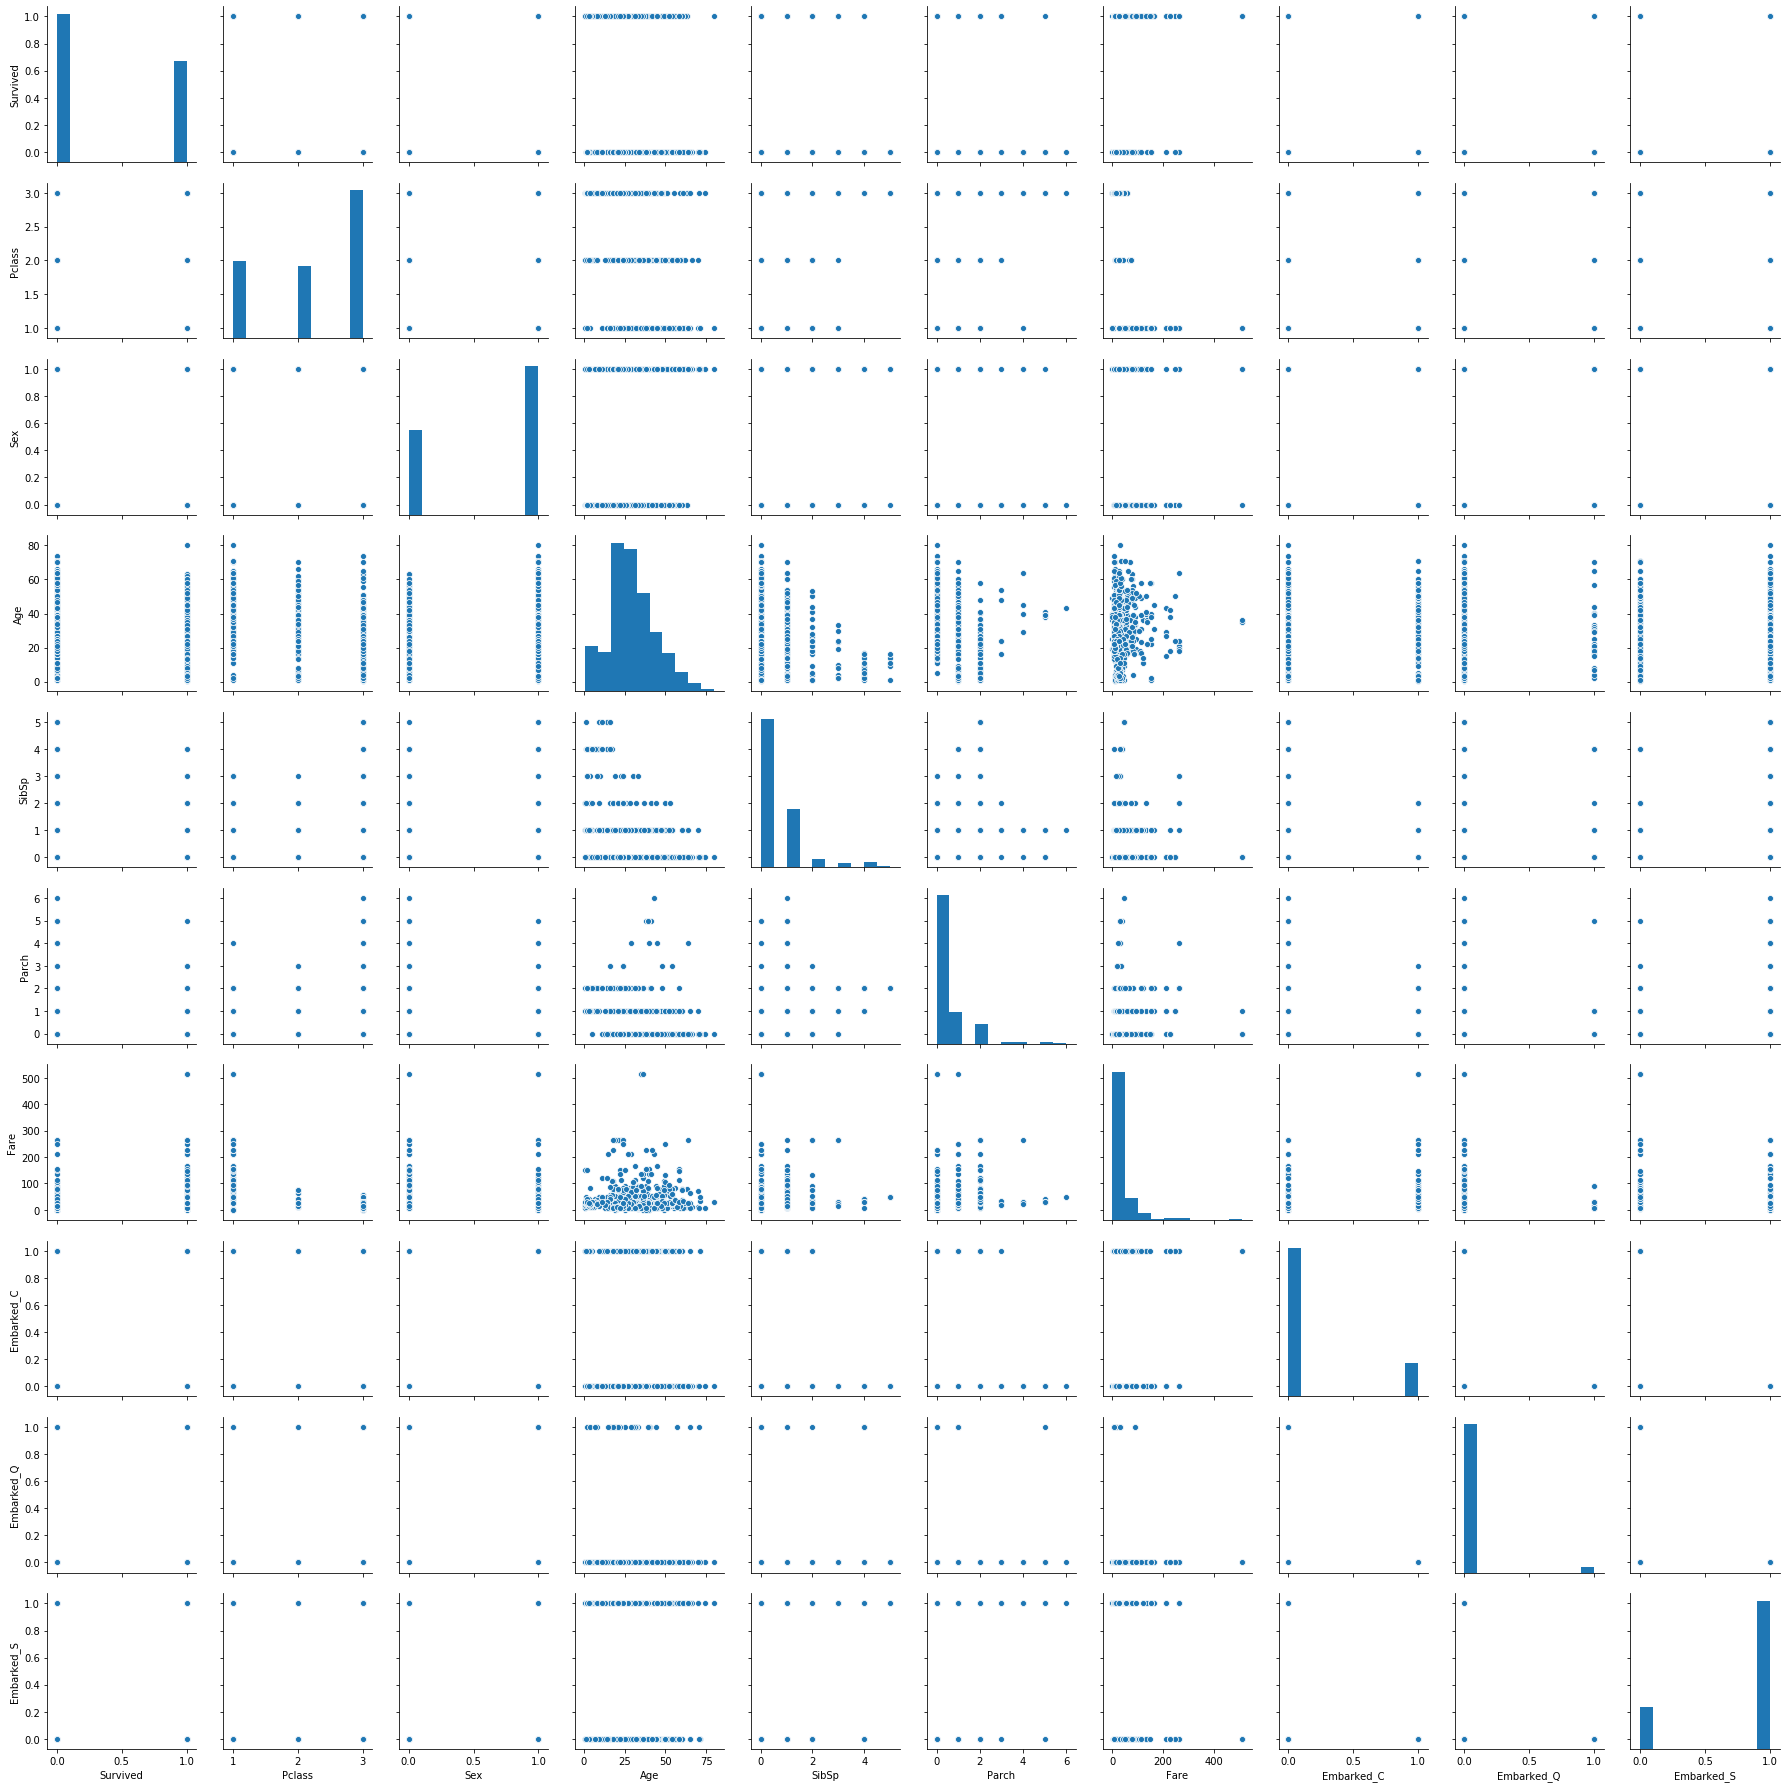

In [27]:
sns.pairplot(titanic_df)
plt.show()
